In [1]:
from src.point import *

In [2]:
test_input = """x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504""".splitlines()

In [3]:
import re

input = open("17.txt").read().splitlines()
input[:2]

['x=647, y=567..595', 'y=175, x=502..524']

In [4]:
pattern = re.compile("^([xy])=(\d+), ([xy])=(\d+)..(\d+)$")
rows = [pattern.match(line).groups() for line in input]

In [5]:
[EMPTY, FLOWING, STILL, CLAY] = list(range(4))

In [6]:
locs = dict()
clay = []
for dir1, a, dir2, b1, b2 in rows:
    a = int(a)
    for b in range(int(b1), int(b2) + 1):
        p = Point(a, b) if dir1 == "y" else Point(b, a)
        locs[p] = CLAY

In [7]:
minx = min(p.x for p in locs)
maxx = max(p.x for p in locs)
miny = min(p.y for p in locs)
maxy = max(p.y for p in locs)
minx, miny, maxx, maxy

(446, 5, 685, 1919)

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np


def printmap():
    area = np.zeros([maxy - miny + 3, maxx - minx + 3], int)
    for point, val in locs.items():
        area[point.y - miny + 1, point.x - minx + 1] = val
    plt.figure(figsize=(40, 40))
    plt.imshow(area)

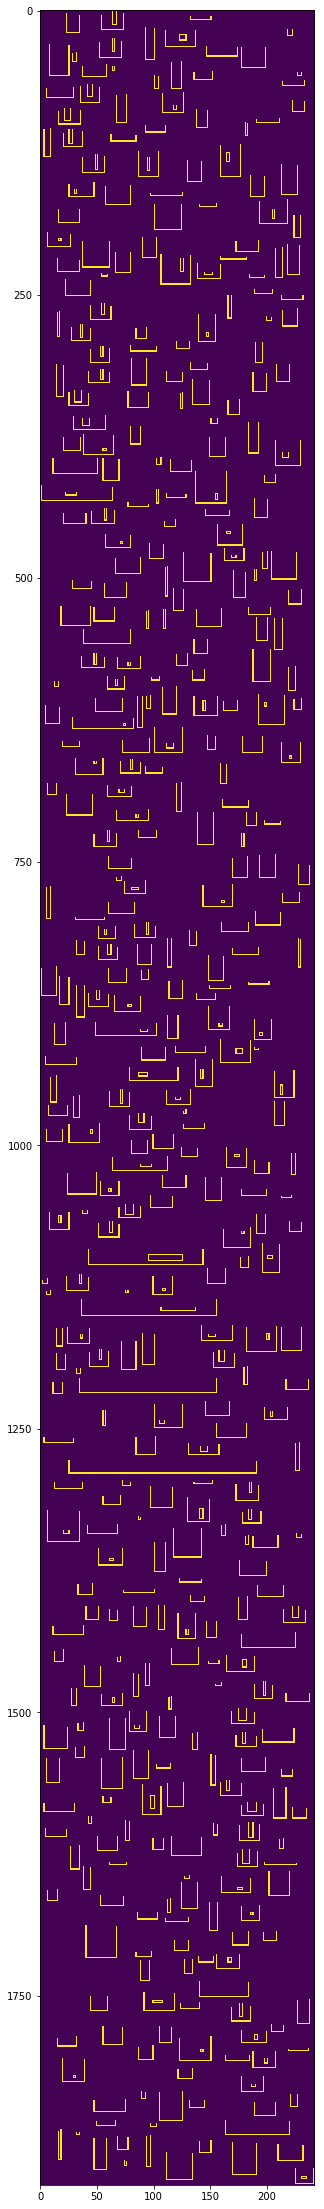

In [9]:
printmap()

In [10]:
def fall(p):
    """Water falling down from p"""
    # print(f"fall:{p}")
    while p.y <= maxy:
        p = p.down()
        locs[p] = FLOWING
        if locs.get(p.down(), 0) >= STILL:  # STILL or CLAY
            flow(p)
            break

In [11]:
def flow(p):
    """Water flowing horizontally"""
    # print(f"flow:{p}")
    bounded_left, elements_left = flow_dir(p, LEFT)
    bounded_right, elements_right = flow_dir(p, RIGHT)
    full = bounded_left and bounded_right
    val = STILL if full else FLOWING
    for el in set.union(elements_left, elements_right, {p}):
        locs[el] = val
    if full:
        flow(p.up())

In [12]:
def flow_dir(p, dir=LEFT):
    """water flowing left or right until it hits a wall or creates another source"""
    res = set()
    while True:
        p_next = p + dir

        if locs.get(p_next, 0) == CLAY:
            return (True, res)
        else:
            res.add(p_next)
            below = p_next.down()
            if below not in locs:
                fall(p_next)  # after this, below is 1 or 2
            if locs[below] == FLOWING:
                return (False, res)
        p = p_next

In [13]:
%%time
source = Point(0, 500)
fall(source)

Wall time: 508 ms


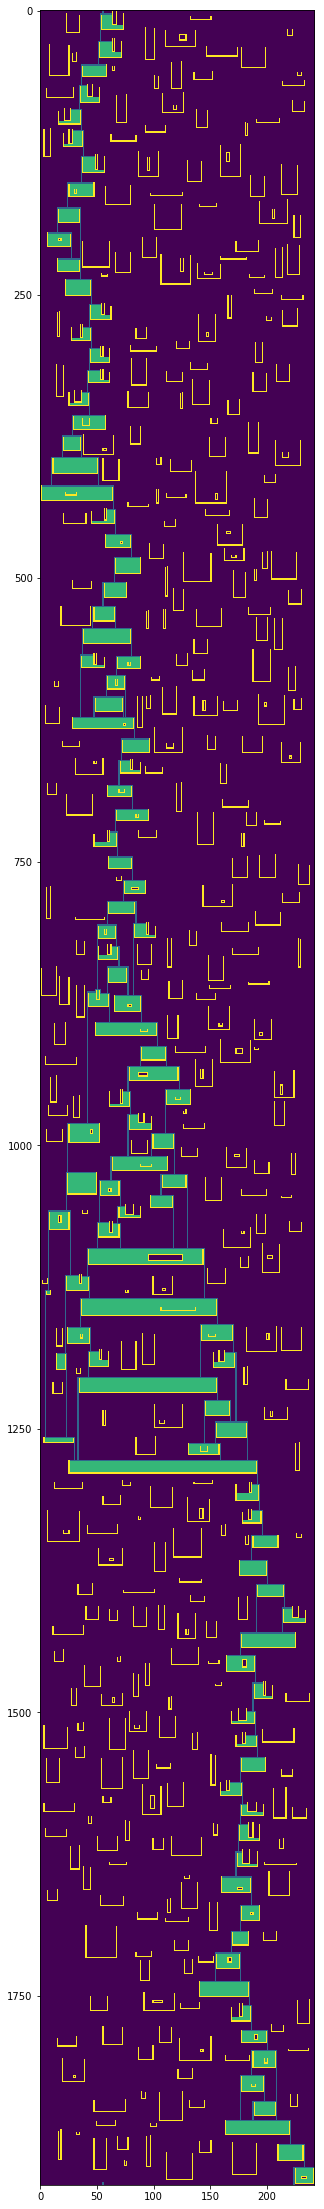

In [14]:
printmap()

# Part I

In [15]:
sum(1 for k, v in locs.items() if v in (FLOWING, STILL) and miny <= k.y <= maxy)

33724

# Part II

In [16]:
sum(1 for k, v in locs.items() if v == STILL and miny <= k.y <= maxy)

27420